# Bibliotecas

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
from keras.callbacks import ModelCheckpoint


## Funções Auxiliares

In [5]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Loss')
    plt.legend()

# Análise dos Dados

## Carregando a base de dados

In [6]:
iris = datasets.load_iris()

## Criando os dados para o treino.

In [7]:
features = iris.feature_names
X = iris.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
X.shape

(150, 4)

In [9]:
classes = iris.target_names
y = iris.target
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
y.shape

(150,)

## Analisando a distribuição da variável resposta

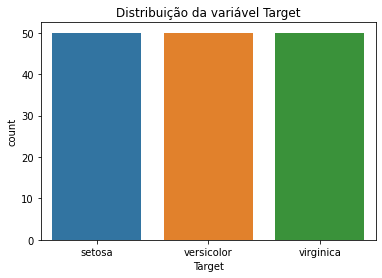

In [12]:
sns.countplot(x = y)
plt.title('Distribuição da variável Target')
plt.xlabel('Target')
plt.xticks(ticks=range(0,3), labels=classes)
plt.show()

## Padronizando os dados com o StandardScaler do SKlearn. 
### Dados padronizados entre 0 e 1.

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Transformando a variável resposta em "One-hot vector".

In [14]:
num_features = X.shape[1]
y = to_categorical(y)
num_classes = y.shape[1]
print(y.shape)
y[:5]

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## Dividindo a Base de Dados entre 80% Treino e 20% Teste.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(120, 4)

In [17]:
y_train.shape

(120, 3)

# Modelo de MLP

## Criando o modelo

In [18]:
model = Sequential()
model.add(Dense(8, input_dim=num_features, activation='relu'))
model.add(Dense(num_classes , activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


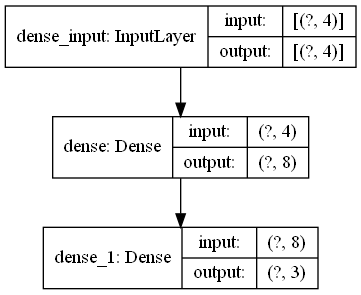

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Compilando e treinando o modelo. 
### Vamos utilizar a função de Callback ModelCheckPointer para salvar o modelo com a melhor accuracia na base de validação (que é a mesma de teste final pois temos uma base muito pequena)

In [19]:
%%time
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex3_1.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=16, callbacks=[checkpointer])

Epoch 1/500
1/8 [==>...........................] - ETA: 0s - loss: 1.2629 - accuracy: 0.3125
Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to .\modelo_mlp_ex3_1.hdf5
8/8 [==============================] - 0s 24ms/step - loss: 1.1953 - accuracy: 0.3333 - val_loss: 1.2144 - val_accuracy: 0.3333
Epoch 2/500
1/8 [==>...........................] - ETA: 0s - loss: 1.1935 - accuracy: 0.1875
Epoch 00002: val_accuracy did not improve from 0.33333
8/8 [==============================] - 0s 4ms/step - loss: 1.1587 - accuracy: 0.3333 - val_loss: 1.1752 - val_accuracy: 0.3333
Epoch 3/500
1/8 [==>...........................] - ETA: 0s - loss: 1.0723 - accuracy: 0.5000
Epoch 00003: val_accuracy did not improve from 0.33333
8/8 [==============================] - 0s 6ms/step - loss: 1.1242 - accuracy: 0.3333 - val_loss: 1.1388 - val_accuracy: 0.3333
Epoch 4/500
1/8 [==>...........................] - ETA: 0s - loss: 1.0330 - accuracy: 0.4375
Epoch 00004: val_accuracy did not impro

## Gráfico comparativo da Acurácia e Perda no treinamento

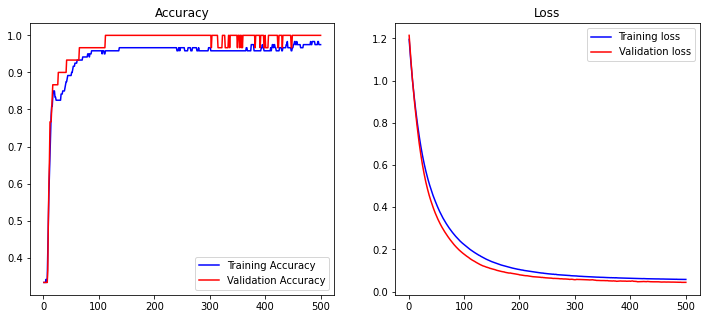

In [20]:
plot_history(history)

## Apresentando a Acurácia final do Treino, carregando o melhor modelo salvo e apresentando a Acurácia do Teste

In [21]:
scores = model.evaluate(X_train, y_train)
print()
print(f"Acuracia do Treino: {round(scores[1]*100,2)}%")

4/4 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9750

Acuracia do Treino: 97.5%


In [22]:
model = load_model("./modelo_mlp_ex3_1.hdf5")

In [23]:
scores = model.evaluate(X_test, y_test)
print()
print(f"Acuracia do Teste: {round(scores[1]*100,2)}%")

1/1 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 1.0000

Acuracia do Teste: 100.0%
